**Exercise 3.1** 

Devise three example tasks of your own that fit into the reinforcement learning framework, identifying for each its states, actions, and
rewards. Make the three examples as different from each other as possible.
The framework is abstract and flexible and can be applied in many different
ways. Stretch its limits in some way in at least one of your examples.

**An RL agent that plays Pokemon, say Pokemon Emerald gameboy version. This would correspond to a infinite MDP.**
- Its states would be the image of the gameboy screen at a given time (which is very large)
- The actions are the buttons on the gameboy
- And the rewards would be whatever we decide them to be (e.g. +10 for completing an arena, +1 for beating a pokemon, -5 for losing ...)

The actions only depend on the current state.
  

**The case of a Retail store, the agent is in charge of ordering stocks and maintaining the warehouse :** <br>
  - The states could be the observation of the demand, say every hour, and the current stock available (both in the warehouse and on sale). It could also contain information about the day of the week and the hour itself. <br>
  - The actions would be how much stock the agent orders for each type of item the store sells. <br>
  - The rewards would be benefits/losses of selling and ordering stocks. <br>

It is almost an MDP, because the actions the agent selects mostly depend on the current state, but one could argue that it could also depend on the past. If there was an enormously large demand the last 48 hours, maybe this information could be useful to decide what to do next ?

**Exercise 3.2** 

Is the reinforcement learning framework adequate to usefully represent all goal-directed learning tasks? Can you think of any clear exceptions?


**Exercise 3.3** 

Consider the problem of driving. You could define the actions
in terms of the accelerator, steering wheel, and brake, that is, where your
body meets the machine. Or you could define them farther out—say, where
the rubber meets the road, considering your actions to be tire torques. Or
you could define them farther in—say, where your brain meets your body, the
actions being muscle twitches to control your limbs. Or you could go to a
really high level and say that your actions are your choices of where to drive.
What is the right level, the right place to draw the line between agent and
environment? On what basis is one location of the line to be preferred over
another? Is there any fundamental reason for preferring one location over
another, or is it a free choice?

It moslty depends on what our goal is when formalizing the problem :
- If our goal was to create autonomous cars without an actual robot controlling the wheel, then we could define the actions as in the embodiment of the car. That means the agent could take control of the car's engine to accelerate, decelerate, rotate the tires etc... by accessing the engine directly, not by using the brake/accelerator/steering wheel.
- If our goal is to create a robot that drives autonomously a car, then we could define the actions as all that control the robot's limbs, and therefore movements.
- On the other hand, a GPS simply dictates on a higher level what path the car should follow.

Where to place that line also depends on the complexity of solving the corresponding reinforcement learning problem. A GPS's decisions is certainly simpler to learn than learning to drive an autonomous car.

**Exercise 3.4** 

Suppose you treated pole-balancing as an episodic task but
also used discounting, with all rewards zero except for −1 upon failure. What
then would the return be at each time? How does this return differ from that
in the discounted, continuing formulation of this task?


*The return of episode i, at timestep t, $G_t^i$, would be $\gamma^0 R_{t+1}^i + \gamma^1 R_{t+2}^i + ... + \gamma^{\tau-t} R_{t+\tau}^i = -\gamma^{\tau-t}$ where $\tau$ is the timestep at which the failure happens.* <br>

In the continuing formulation of this task, assuming the pole is reset to vertical after each failure and task keeps going after, <br>
then the return would be $G_t = -\gamma^{\tau_1 - t} -\gamma^{\tau_2 - t} - \gamma^{\tau_3 - t} - ... -\gamma^{\tau_k - t}$ where $\tau_k$ is the timestep at which failure k happens. <br>

The difference from the episodic case, is that the discount factors are not reset after each failure, making it less penalizing to have a failure after having started long ago.

**Exercise 3.5** 

Imagine that you are designing a robot to run a maze. You decide to give it a reward of +1 for escaping from the maze and a reward of zero
at all other times. The task seems to break down naturally into episodes—the
successive runs through the maze—so you decide to treat it as an episodic task,
where the goal is to maximize expected total reward (3.1). After running the
learning agent for a while, you find that it is showing no improvement in escaping from the maze. What is going wrong? Have you effectively communicated
to the agent what you want it to achieve?

(Assuming no discounting)

Whether the agent takes 10 steps to escape the maze or 1 000 000 steps, it'll earn a reward of +1 for escaping in this setup. The reward doesn't encourage the robot to escape the maze faster. This could be the reason why the robot shows no signs of improvement, during its training, it might take 10 000 000 steps before escaping, thus receiving a positive signal which makes the learning process really slow...

(Assuming discounting)

If there is discounting, the faster the robot escapes the maze, the more reward it'll earn. But during its training, if it took 1 000 000 steps to escape, then it'll get a positive, but very close to 0 reward. This doesn't reinforce the positive signal it should get for escaping the maze, hence making the training slow again.

**Exercise 3.6: Broken Vision System**

Imagine that you are a vision
system. When you are first turned on for the day, an image floods into your
camera. You can see lots of things, but not all things. You can’t see objects
that are occluded, and of course you can’t see objects that are behind you.
After seeing that first scene, do you have access to the Markov state of the
environment?

The *environment state* is defined as whatever information is available to the agent. It is said to be *Markov* if it retains all past relevant information for the agent all the past information. It is, in a way, summarized in a compact way into the current state. Here the fact that the Vision System doesn't see objects that are occluded and objects that are behind the System do not violate the definition of the *environment state*. However is it not a Markov state, because it doesn't include past informations, the system doesn't know anyting about what the images were before being turned on for the day.

Suppose your camera was broken that day and you received no images at all, all day. Would you have access to the Markov state then?

In this case yes, because the information that there is no image received compactly summarizes the past informations : the camera has been broken all day.

**Exercise 3.8**

What is the Bellman equation for action values, that is, for $q_π$?
It must give the action value $q_π(s,a)$ in terms of the action values, $q_π(s',a')$
of possible successors to the state–action pair (s, a). As a hint, the backup
diagram corresponding to this equation is given in Figure 3.4b. Show the
sequence of equations analogous to (3.12), but for action values.

\begin{aligned}
    q_\pi(s,a) &:= \mathbb{E_\pi} \Bigr[ G_t \ | \ S_t=s, A_t=a \Bigr] \\
    &= \mathbb{E}_\pi \Bigr[R_{t+1} + \gamma \sum_{k=0}^{\infty} \gamma^k R_{t+k+2} \ | \ S_t=s, A_t=a \Bigr] \\
    (\text{tower property + Markov}) &= \mathbb{E}_\pi \Bigr[ R_{t+1} + \gamma \mathbb{E}_\pi \bigr[\sum_{k=0}^{\infty} \gamma^k R_{t+k+2} \ | \ A_{t+1}, S_{t+1} \bigr] \ | \ S_t = s, A_t=a\Bigr] \\ 
    &= \mathbb{E}_\pi \Bigr[ R_{t+1} + \gamma q_\pi(S_{t+1},A_{t+1}) \ | \ S_t = s, A_t=a \Bigr] \\ 
    &= \sum_{s',r,a'} \mathbb{P}(R_{t+1} = r, q_\pi(S_{t+1},A_{t+1}) = q_\pi(s',a') \bigr| S_t=s, A_t=a) \Bigr[ r+\gamma q_\pi(s',a') \Bigr] \\
    &= \sum_{s',r,a'} \mathbb{P}(S_{t+1} = s', R_{t+1} = r, A_{t+1} = a' \bigr| S_t=s,A_t=a) \Bigr[ r+\gamma q_\pi(s',a') \Bigr] \\
    (\text{*}) &= \sum_{s',r} \sum_{a'} \mathbb{P}(A_{t+1}=a' \bigr| S_{t+1}=s',R_{t+1}=r) \ \mathbb{P}(S_{t+1} = s', R_{t+1} = r \bigr| S_t=s,A_t=a) \Bigr[ r+\gamma q_\pi(s',a') \Bigr] \\
    q_\pi(s,a) &= \sum_{s',r} p(s',r|s,a) \sum_{a'} \pi(a'|s') \Bigr[ r+\gamma q_\pi(s',a') \Bigr]
\end{aligned}

**Exercise 3.9**

The Bellman equation (3.12) must hold for each state for the
value function $v_π$ shown in Figure 3.5b. As an example, show numerically that
this equation holds for the center state, valued at +0.7, with respect to its four
neighboring states, valued at +2.3, +0.4, −0.4, and +0.7. (These numbers are
accurate only to one decimal place.)

Recall the bellman equation for the state value : 
\begin{equation*}
    v_\pi(s) = \sum_a \pi(a|s) \sum_r \sum_{s'} p(s',r|s,a) \Bigr[ r+\gamma v_\pi(s') \Bigr]
\end{equation*}

- The policy is 25% chance of going up, down, left, right which means $\pi(a|center)=0.25 \ \forall a \in$ {left,right,up,down}. <br>
- At the center cell, the reward is $r=0$. <br>
- The transition probabilities are $p(s',r|s,a)=1$ when s' is the state corresponding to taking action a in state s, 0 otherwise. (In other words, at the center, when the agent chooses to move a certain direction, it'll move this direction with probability 1). <br>
- $\gamma = 0.9$

So the value at the center is :

In [4]:
gamma = 0.9
actions = ["up", "right", "down", "left"]
neighbour_values = dict(zip(actions, [2.3,0.4,-0.4,0.7]))
print(neighbour_values)
pi = dict(zip(actions, [0.25,0.25,0.25,0.25]))
print(pi)
transition = 1
r = 0

print("Value at the center :", sum([pi[action] * transition * (r + gamma * neighbour_values[action]) for action in actions]))

{'up': 2.3, 'right': 0.4, 'down': -0.4, 'left': 0.7}
{'up': 0.25, 'right': 0.25, 'down': 0.25, 'left': 0.25}
Value at the center : 0.6749999999999999


**Exercise 3.10**

In the gridworld example, rewards are positive for goals,
negative for running into the edge of the world, and zero the rest of the time.
Are the signs of these rewards important, or only the intervals between them?

To obtain the optimal policy, we could have defined the following rewards : 
0 for running into the edge of the world, +11 and +6 to the states A and B respectively, +1 for every other state.
The result would essentially be the same as the agent would still try to do more good actions, and less relatively bad actions

Prove, using (3.2), that adding a constant c to all the rewards adds a constant,
$v_c$, to the values of all states, and thus does not affect the relative values of
any states under any policies. What is $v_c$ in terms of c and $γ$?

Let $\bar{R}_t = R_t + c$, then :
\begin{aligned}
    \bar{G}_t &:= \sum_k \gamma^k \bar{R}_{t+1+k} \\
    &= \sum_k \gamma^k (c+R_{t+1})
\end{aligned}

and 

\begin{aligned}
    \forall s \in \mathcal{S}, \ \bar{v}_\pi(s) &:= \mathbb{E} \Bigr[ \sum_k \gamma^k (c+R_{t+1}) \bigr| S_t=s \Bigr] \\
    &= \sum_k \gamma^k c + \mathbb{E} \Bigr[ \sum_k \gamma^k R_{t+1} \bigr| S_t=s \Bigr] \\
    \bar{v}_\pi(s) &= v_c + v_\pi(s)
\end{aligned}

The expression of $v_c$
\begin{aligned}
    v_c &= c \sum_k \gamma^k \\
    &= \frac{c}{(1-\gamma)}
\end{aligned}

**Exercise 3.11**

Now consider adding a constant c to all the rewards in an
episodic task, such as maze running. Would this have any effect, or would it
leave the task unchanged as in the continuing task above? Why or why not?
Give an example.

In an episodic task, the return suddenly is no longer the sum up to an infinite timestep, but rather stops at the terminal timestep $\tau$ <br>
And since $\tau$ is stochastic, it may be different from one trajectory to another, creating different values of $v_c$ depending on the length of that trajectory. In the episodic case :
\begin{aligned}
    v_c &= c \sum_{k=0}^{\tau} \gamma^k \\
    &= c \frac{1 - \gamma^{\tau}}{1-\gamma}
\end{aligned}

Typically for states that are closer to the terminal states, then $v_c$ would be lower because they are more likely to end earlier. <br>
On the other hand, for states that are far away from terminal states, then their $v_c$ would be larger

**Exercise 3.12**

The value of a state depends on the the values of the actions
possible in that state and on how likely each action is to be taken under the
current policy. We can think of this in terms of a small backup diagram rooted
at the state and considering each possible action:

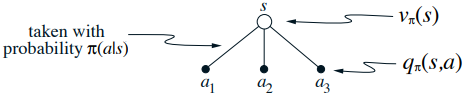

Give the equation corresponding to this intuition and diagram for the value at
the root node, $v_π(s)$, in terms of the value at the expected leaf node, $q_π(s, a)$,
given $S_t = s$. This expectation depends on the policy, $π$. 

\begin{equation*}
    v_\pi(s) = \mathbb{E_\pi} \Bigr[ q_\pi(s,A_t) | S_t=s \Bigr]
\end{equation*}

Then give a second equation in which the expected value is written out explicitly in terms of $π(a|s)$
such that no expected value notation appears in the equation.

\begin{align*}
    v_\pi(s) &= \sum_a \mathbb{P}(A_t=a|S_t=s) q_\pi(s,a) \\
    &= \sum_a \pi(a|s) q_\pi(s,a)
\end{align*}

**Exercise 3.13**

The value of an action, $q_π(s, a)$, depends on the expected
next reward and the expected sum of the remaining rewards. Again we can think of this in terms of a small backup diagram, this one rooted at an action (state–action pair) and branching to the possible next states:
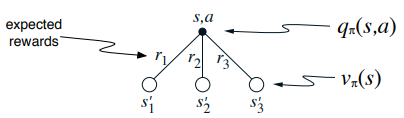

Give the equation corresponding to this intuition and diagram for the action
value, $q_π(s, a)$, in terms of the expected next reward, $R_{t+1}$, and the expected
next state value, $v_π(S_{t+1})$, given that $S_t = s$ and $A_t = a$.

\begin{aligned}
    q_\pi(s,a) &= \mathbb{E_\pi} \Bigr[ R_{t+1} + \gamma v_\pi(S_{t+1}) \ | \ S_t=s,A_t=a \Bigr]
\end{aligned}

Then give a second
equation, writing out the expected value explicitly in terms of $p(s', r|s, a)$
defined by (3.6), such that no expected value notation appears in the equation.

\begin{aligned}
    q_\pi(s,a) &= \sum_{s',r} p(s',r|s,a) \Bigr[ r + \gamma v_\pi(s') \Bigr]
\end{aligned}

**Exercise 3.14**

 Draw or describe the optimal state-value function for the golf
example

**Exercise 3.15** 

Draw or describe the contours of the optimal action-value
function for putting, q∗(s, putter), for the golf example.

**Exercise 3.16**

Give the Bellman equation for q∗ for the recycling robot.